# Statistical Data Analysis: Machine Learning Assignment

# SOLUTIONS

- Statistical Data Analysis (SPA6328)
- Academic Year: 2020-2021
- Module Organiser: Dr Seth Zenz
- Module Associate: Prof Adrian Bevan

Copyright (C) Queen Mary University of London

## This assessment is for summative feedback.

In this assignment you will analyse the iris data using decision tree based classifiers.  Specifically we are using the AdaBoost decision tree.  Each decision tree by itself is considered a weak learner, and the AdaBoost computes an output based on a collection of trees. This weighted averaging process leads to a more robust machine learning algorithm (i.e. one that is more robust in that its outputs on new unseen data samples should be similar to that used for testing and training, and that overtraining issues are reduced).  The process also results in what is called a strong learner - one that has a stronger separation between different categories of event than would be the case with a single tree, or indeed the individual features that are input into that tree.

By now you should be very familiar with the iris data, both in terms of the 1D and 2D information, and what you can learn from the 1D distributions in terms of the ability to separate the three different types of iris from each other.  Here we take the next step to use a machine learning algorithm to simultaneously benefit from the 4-dimensional feature space to separate signal from background.

## Task

Train a classifier using the iris data and study the performance characteristics of this classifier in detail by working through this notebook.
You should:
- Work through the Iris data decision tree classification example in order to answer the following questions
  - Using a train split of 0.5. Explore the effect of (a) changing the number of estimators, and (b) changing the tree depth, on the performance of the classifier. For this exercise tabulate results for including 10, 100, 500 and 1000 estimators (i.e. boosting iterations) and for tree depths of 1, 2, 3.  Measure performance by the fraction of mis-classified test examples.
  - Repeat the above using a train split of 0.8.
  - What is the configuration that leads to the least number of mis-classified examples.
  - Why do you think, in detail, that any residual example(s) are mis-classified by the algorithm. If there are no-mis-classified examples, then does that concern you with regard to the use of this algorithm and the sample sizes used for train and test. You may wish to reflect on the earlier formative assignments and the notes to guide your response to this question.
  - Reflect on the results you obtained for the train split size. Remark on any differences in performance that you observe.


Load the sklearn Iris data

Iris data have been split into test and train samples
	N(train)             =  120
	N(test)              =  30
	Train split          =  0.8
	number_of_estimators =  10
	tree_depth           =  3
	min_leaf_size        =  1
Fit the decision tree
... now compute the decision tree score

Decision Tree Classifier Score is:
	Train Score =  1.0  (This measure of performance is biased)
	Test Score  = 1.0000
	Number of mis-classified test data = 0.0, fraction of mis-classified examples = 0.000

Study the test data

confusion matrix (test) = 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


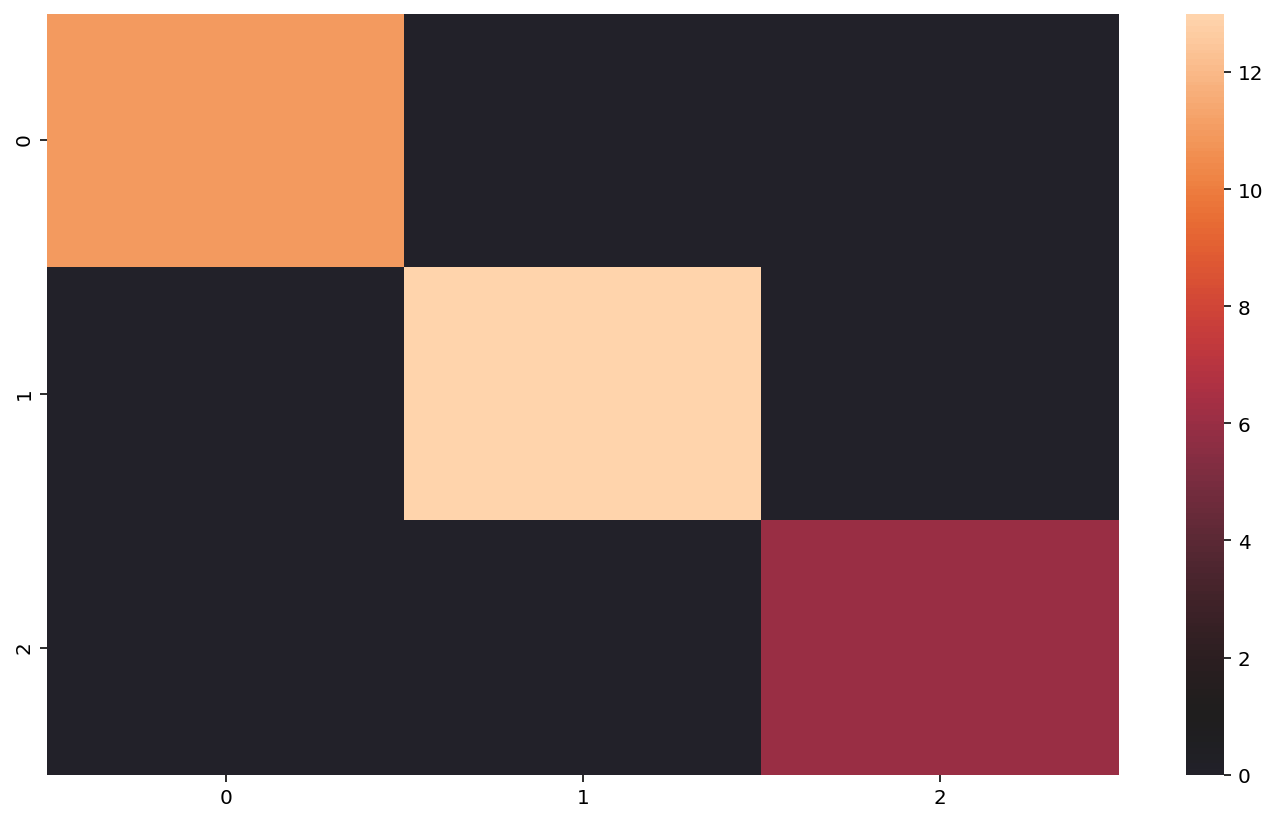

Truth	Prediction	P(type = 1)	P(type = 2)	P(type = 3)	Correct Prediction
2	2	0.0000	0.0000	1.0000	True
1	1	0.0000	1.0000	0.0000	True
0	0	1.0000	0.0000	0.0000	True
2	2	0.0000	0.0000	1.0000	True
0	0	1.0000	0.0000	0.0000	True
2	2	0.0000	0.0000	1.0000	True
0	0	1.0000	0.0000	0.0000	True
1	1	0.0000	1.0000	0.0000	True
1	1	0.0000	1.0000	0.0000	True
1	1	0.0000	1.0000	0.0000	True
2	2	0.0000	0.0000	1.0000	True
1	1	0.0000	1.0000	0.0000	True
1	1	0.0000	1.0000	0.0000	True
1	1	0.0000	1.0000	0.0000	True
1	1	0.0000	1.0000	0.0000	True
0	0	1.0000	0.0000	0.0000	True
1	1	0.0000	1.0000	0.0000	True
1	1	0.0000	1.0000	0.0000	True
0	0	1.0000	0.0000	0.0000	True
0	0	1.0000	0.0000	0.0000	True
2	2	0.0000	0.0000	1.0000	True
1	1	0.0000	1.0000	0.0000	True
0	0	1.0000	0.0000	0.0000	True
0	0	1.0000	0.0000	0.0000	True
2	2	0.0000	0.0000	1.0000	True
0	0	1.0000	0.0000	0.0000	True
0	0	1.0000	0.0000	0.0000	True
1	1	0.0000	1.0000	0.0000	True
1	1	0.0000	1.0000	0.0000	True
0	0	1.0000	0.0000	0.0000	True


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
#
# If having studied the iris data you wish to (not assessed) explore a larger data set, then the 
# NIST handwriting data (numbers 0, 1, 2, ... 9) can be loaded using load_digits. To use this one
# needs to change n_classes to 10.
#
# Uncomment the following line to import the load_digits function
#
#from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Parameters
n_classes = 3
plot_colors = "ryb"
train_split_size = 0.8     # the fraction of examples used for training
number_of_estimators = 10 # the number of boosting iterations
tree_depth    = 3          # number of divisions of data
min_leaf_size = 1          # minimum number of examples in a leaf

# Load data
print("\033[1mLoad the sklearn Iris data\033[0m\n")
iris = load_iris()

# split the data into test and train samples. The train sample will be used to learn
# the model, and the test sample will be used to evaluate module performance.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0, train_size=train_split_size)
print("Iris data have been split into test and train samples")
print("\tN(train)             = ", len(X_train))
print("\tN(test)              = ", len(X_test))
print("\tTrain split          = ", train_split_size)
print("\tnumber_of_estimators = ", number_of_estimators)
print("\ttree_depth           = ", tree_depth)
print("\tmin_leaf_size        = ", min_leaf_size)


print("\033[1mFit the decision tree\033[0m")
DT_clf  = DecisionTreeClassifier(max_depth=tree_depth, min_samples_leaf=min_leaf_size)
BDT_clf = AdaBoostClassifier(base_estimator=DT_clf, n_estimators=number_of_estimators).fit(X_train, y_train)

print("... now compute the decision tree score")
train_score = BDT_clf.score(X_train, y_train)
test_score  = BDT_clf.score(X_test, y_test)

print("\nDecision Tree Classifier Score is:")
print("\tTrain Score = ", train_score, " (This measure of performance is biased)")
print("\tTest Score  = {:5.4f}".format(test_score))
n_misclassified = (1-test_score)*len(X_test)
print("\tNumber of mis-classified test data = {:2.1f}, fraction of mis-classified examples = {:4.3f}".format(n_misclassified, 1-test_score ))


#
# Use the test data to compute a confusion matrix and to compare predictions against
# the ground truth labels.
#
print("\n\033[1mStudy the test data\033[0m")
predictions = BDT_clf.predict(X_test)
prob_predictions = BDT_clf.predict_proba(X_test)
BDTcm = confusion_matrix(y_test, predictions)
print("\nconfusion matrix (test) = \n", BDTcm)
sns.heatmap(BDTcm, center=True)
plt.show()

#
# Compare the ground truth and model prediction
#
print("Truth\tPrediction\tP(type = 1)\tP(type = 2)\tP(type = 3)\tCorrect Prediction")
for i in range(len(predictions)):
    Match = False
    if predictions[i] == y_test[i]:
        Match = True
    print("{:}\t{:}\t{:5.4f}\t{:5.4f}\t{:5.4f}\t{:}".format(y_test[i], predictions[i], prob_predictions[i][0], prob_predictions[i][1], prob_predictions[i][2], Match))



---------------------------
## Solution

Table exploring the effect of (a) changing the number of estimators, and (b) changing the tree depth, on the performance of the classifer. For this exercise tabulate results for including 10, 100, 500 and 1000 estimators (i.e. boosting iterations) and for tree depths of 1, 2, 3.  Measure performance by the fraction of mis-classified test examples.


----------------
Test split = 0.5
| Tree Depth  | 10 iter  | 100 iter  | 500 iter  | 1000 iter |
| ----------- | -------- | --------- | --------- | --------- |
| 1           | 0.080    | 0.080     | 0.080     | 0.080     |
| 2           | 0.040    | 0.040     | 0.133     | 0.040     |
| 3           | 0.040    | 0.040     | 0.040     | 0.040     |

----------------
Test split = 0.8
| Tree Depth  | 10 iter  | 100 iter  | 500 iter  | 1000 iter |
| ----------- | -------- | --------- | --------- | --------- |
| 1           | 0.033    | 0.100     | 0.100     | 0.100     |
| 2           | 0.000    | 0.033     | 0.000     | 0.000     |
| 3           | 0.000    | 0.033     | 0.033     | 0.033     |


From the results obtained State the least number of mis-classified examples:

   **min(N-misclassified) = 0**

Reflect on this outcome

   **With a train split of 0.5 there are 75 training examples, with a 0.8 fraction there are 120 training examples. These are small numbers of data.  It is possible to perfectly classify the data using the decision tree approach with these limited samples, however this algorithm has a potential for overtraining to occur.  The perfect classification could be related to having overtrained the trees.  To test that one would want to do further study, and/or have a larger data sample.**

